In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Preprocessing


In [2]:
symptoms = pd.read_csv(r"C:\Users\leema\Documents\Period Symptom Data (anonymized) - Symptom.csv")

In [3]:
cycle = pd.read_csv(r"C:\Users\leema\Documents\Period Symptom Data (anonymized) - Periods.csv" , dayfirst = True)

In [4]:
cycle = cycle.iloc[1:,1:]

In [5]:
cycle.head(20)

,record_id,user_id,period_start_date,period_end_date
1,352,252,5/4/15,10/4/15
2,353,253,23/3/15,27/3/15
3,354,254,6/4/15,11/4/15
4,355,255,21/3/15,24/3/15
5,356,256,26/3/15,31/3/15
6,357,257,10/3/15,15/3/15
7,358,257,11/4/15,15/4/15
8,359,258,11/3/15,15/3/15
9,360,258,11/4/15,15/4/15
10,361,259,1/3/15,6/3/15


In [6]:
symptoms = symptoms.iloc[1:,1:]


In [7]:
symptoms

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
1,127,252,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11/4/15
2,128,257,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,10/4/15
3,129,257,0,0.0,0.0,0.0,0.0,27.0,48.0,0.0,0.0,0.0,11/4/15
4,130,263,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11/4/15
5,132,269,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11/4/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508,13728,6953,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22/3/19
14509,13729,6453,12,22.0,0.0,79.0,0.0,0.0,0.0,55.0,2.0,59.0,22/3/19
14510,13730,6713,0,31.0,23.0,36.0,0.0,0.0,25.0,0.0,0.0,17.0,22/3/19
14511,13731,2253,0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,13.0,22/3/19


In [8]:
cycle[cycle.duplicated()]



,record_id,user_id,period_start_date,period_end_date
34943,37749,2924,27/1/19,31/1/19
34944,37750,5836,24/1/19,31/1/19
34945,37751,6357,16/1/19,23/1/19
34946,37752,4801,27/1/19,NaN
34947,37753,5023,27/1/19,31/1/19
...,...,...,...,...
35938,38805,4592,22/3/19,NaN
35939,38806,843,21/3/19,NaN
35940,38807,3279,22/3/19,NaN
35941,38808,1346,15/3/19,19/3/19


In [9]:
cycle.drop_duplicates(inplace = True)

In [10]:
len(cycle)

34942

In [11]:
symptoms[symptoms.duplicated()]

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
13513,12732,6525,10,66.0,91.0,26.0,0.0,0.0,0.0,76.0,0.0,31.0,6/10/18
13514,12733,6525,0,21.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8/10/18
13515,12734,6692,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8/10/18
13516,12735,6949,75,0.0,20.0,71.0,0.0,55.0,0.0,100.0,0.0,94.0,8/10/18
13517,12736,6735,35,0.0,0.0,95.0,11.0,0.0,0.0,63.0,0.0,0.0,8/10/18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508,13728,6953,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22/3/19
14509,13729,6453,12,22.0,0.0,79.0,0.0,0.0,0.0,55.0,2.0,59.0,22/3/19
14510,13730,6713,0,31.0,23.0,36.0,0.0,0.0,25.0,0.0,0.0,17.0,22/3/19
14511,13731,2253,0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,13.0,22/3/19


In [12]:
symptoms.drop_duplicates(inplace = True)

In [13]:
symptoms[symptoms.duplicated()]

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date


In [14]:
def date_parse(str):
    if pd.isna(str)==True:
        return np.nan
    else:
        for f in ( "%d/%m/%y","%d/%m/%Y"):
            try:
                dd = datetime.strptime(str,f)
                if dd.year > datetime.now().year:
                    dd = dd.replace(year=dd.year-100)
                    dd = datetime.strptime(dd.strftime("%d/%m/%Y"),"%d/%m/%Y")
                else:
                    dd = datetime.strptime(dd.strftime("%d/%m/%Y"),"%d/%m/%Y")
                return dd
            except:
                pass


In [15]:
cycle['period_start_date'] = list(map(date_parse , cycle['period_start_date']))

cycle['period_end_date'] = list(map(date_parse , cycle['period_end_date']))

symptoms['date'] = list(map(date_parse , symptoms['date']))

In [16]:
cycle

,record_id,user_id,period_start_date,period_end_date
1,352,252,2015-04-05,2015-04-10
2,353,253,2015-03-23,2015-03-27
3,354,254,2015-04-06,2015-04-11
4,355,255,2015-03-21,2015-03-24
5,356,256,2015-03-26,2015-03-31
...,...,...,...,...
34938,38805,4592,2019-03-22,NaT
34939,38806,843,2019-03-21,NaT
34940,38807,3279,2019-03-22,NaT
34941,38808,1346,2019-03-15,2019-03-19


In [17]:
symptoms

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
1,127,252,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-11
2,128,257,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-10
3,129,257,0,0.0,0.0,0.0,0.0,27.0,48.0,0.0,0.0,0.0,2015-04-11
4,130,263,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-11
5,132,269,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13508,13728,6953,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-22
13509,13729,6453,12,22.0,0.0,79.0,0.0,0.0,0.0,55.0,2.0,59.0,2019-03-22
13510,13730,6713,0,31.0,23.0,36.0,0.0,0.0,25.0,0.0,0.0,17.0,2019-03-22
13511,13731,2253,0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,13.0,2019-03-22


In [18]:
cycle['period_end_date'].isna().sum()

2779

In [19]:
cycle['No_days'] = [0 if pd.isna(x)==True else np.nan if x>y else (y-x).days  for x, y  in zip(cycle['period_start_date'],
                                                                                  cycle['period_end_date'])]

In [20]:
# cycle['No_days'] = [0 if x>15 else x for x in cycle['No_days']]

In [21]:
cycle['No_days'] = cycle['No_days'].fillna(cycle.groupby('user_id')['No_days'].transform(lambda x: x.fillna(x.mean())))

In [22]:
cycle['No_days'] = round(cycle['No_days'])


In [23]:
cycle

,record_id,user_id,period_start_date,period_end_date,No_days
1,352,252,2015-04-05,2015-04-10,5.0
2,353,253,2015-03-23,2015-03-27,4.0
3,354,254,2015-04-06,2015-04-11,5.0
4,355,255,2015-03-21,2015-03-24,3.0
5,356,256,2015-03-26,2015-03-31,5.0
...,...,...,...,...,...
34938,38805,4592,2019-03-22,NaT,5.0
34939,38806,843,2019-03-21,NaT,3.0
34940,38807,3279,2019-03-22,NaT,5.0
34941,38808,1346,2019-03-15,2019-03-19,4.0


In [24]:
symptoms

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
1,127,252,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-11
2,128,257,0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-10
3,129,257,0,0.0,0.0,0.0,0.0,27.0,48.0,0.0,0.0,0.0,2015-04-11
4,130,263,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-11
5,132,269,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13508,13728,6953,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-22
13509,13729,6453,12,22.0,0.0,79.0,0.0,0.0,0.0,55.0,2.0,59.0,2019-03-22
13510,13730,6713,0,31.0,23.0,36.0,0.0,0.0,25.0,0.0,0.0,17.0,2019-03-22
13511,13731,2253,0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,13.0,2019-03-22


Data beween

In [25]:
max(cycle['period_start_date'])

Timestamp('2019-03-22 00:00:00')

In [26]:
min(cycle['period_start_date'])

Timestamp('1958-08-05 00:00:00')

There are no nulls in user id

In [27]:
cycle['user_id'].isna().sum()

0

In [28]:
symptoms['user_id'].isna().sum()

0

In [29]:
len(cycle['user_id'].unique())

6703

In [30]:
len(symptoms['user_id'].unique())

3953

Every user in symptoms has a data row in periods

In [31]:
# To find users who added symptoms but not the cycle
notinlist=0
for v in symptoms['user_id'].unique():
    if v not in cycle['user_id'].unique():
        notinlist +=1

In [32]:
notinlist

0

59 % of users has given information about their symptoms which shows user engagement

In [33]:
# customer engagment
"{:.0%}".format((len(symptoms['user_id'].unique())/len(cycle['user_id'].unique())))

'59%'

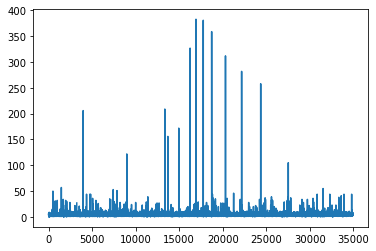

In [33]:
plt.plot(cycle['No_days'])

In [34]:
cycle_fil = cycle[cycle['No_days']<100]

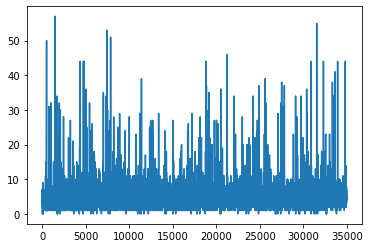

In [35]:
plt.plot(cycle_fil['No_days'])

From the above two charts we can infer that most women have mensurating days between 0 and 10

In [36]:
cycle.sort_values("user_id", inplace=True)

In [37]:
avgUserDays = cycle_fil.groupby('user_id').mean()


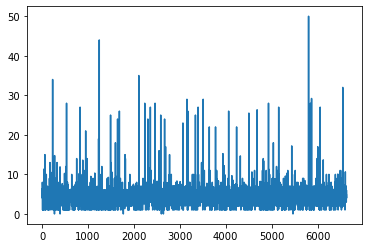

In [38]:
plt.plot(np.array(avgUserDays))

Average no. of mensurating days

In [39]:
avgUserDays.mean()

No_days    4.622545
dtype: float64

In [40]:

midUserDays = cycle_fil.groupby('user_id').median()


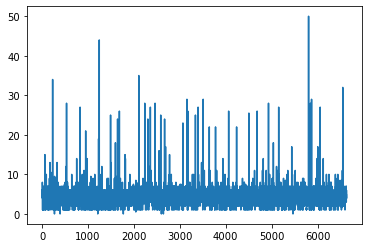

In [41]:
plt.plot(np.array(midUserDays))

Median no. of mensurating days is 4

In [128]:
midUserDays.median()

No_days    4.0
dtype: float64

In [42]:
cycle['month']= cycle['period_start_date'].dt.month_name()
cycle['month_num']= cycle['period_start_date'].dt.month
cycle['year']= cycle['period_start_date'].dt.year
cycle['mon-year']= cycle["month"].astype(str) +" "+ cycle["year"].astype(str)



In [43]:
cycle

,record_id,user_id,period_start_date,period_end_date,No_days,month,month_num,year,mon-year
1160,2000,1000,2015-10-18,2015-10-25,7.0,October,10.0,2015.0,October 2015.0
1157,1997,1000,2015-09-21,2015-09-27,6.0,September,9.0,2015.0,September 2015.0
1159,1999,1000,2015-07-25,2015-07-31,6.0,July,7.0,2015.0,July 2015.0
1158,1998,1000,2015-08-24,2015-08-30,6.0,August,8.0,2015.0,August 2015.0
4319,5480,1001,2016-02-04,2016-02-09,5.0,February,2.0,2016.0,February 2016.0
...,...,...,...,...,...,...,...,...,...
3528,4614,999,2016-01-11,2016-01-15,4.0,January,1.0,2016.0,January 2016.0
3966,5101,999,2016-01-06,2016-01-11,5.0,January,1.0,2016.0,January 2016.0
4425,5599,999,2016-02-08,2016-02-12,4.0,February,2.0,2016.0,February 2016.0
2042,2969,999,2015-11-20,2015-11-24,4.0,November,11.0,2015.0,November 2015.0


In [44]:
cycle_fil = cycle[cycle['No_days']<100]

13 users have no. of mensurating days more than 100. Since no. of rows and the users, they can be considered one time users and ignored

In [45]:
len(cycle[cycle['No_days']>100].user_id)

13

In [46]:
len(cycle[cycle['No_days']>100])

13

Most of the data is availalbe from 2014

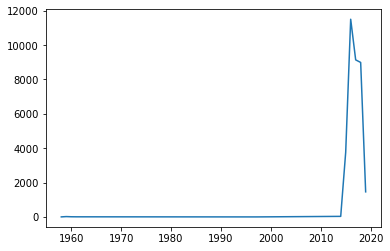

In [47]:

plt.plot( cycle.groupby('year').user_id.agg('count'))

In [48]:
cycle.groupby('year').user_id.agg('count')

year
1958.0        3
1959.0       20
1960.0       10
1961.0        7
1997.0        1
2014.0       33
2015.0     3769
2016.0    11503
2017.0     9138
2018.0     8990
2019.0     1460
Name: user_id, dtype: int64

No. of users were at peak in 2016 and then started declining

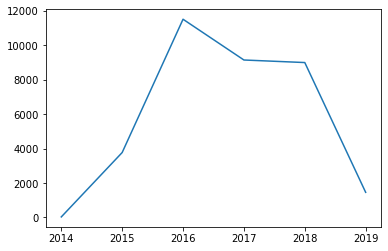

In [49]:

plt.plot( cycle[cycle['year']>2000].groupby('year').user_id.agg('count'))

In [51]:
cycle['year'].unique()

array([2015., 2016., 2017., 2018., 2014., 2019.,   nan, 1959., 1960.,
       1958., 1961., 1997.])

In [52]:
len(cycle_fil['user_id'].unique())

6632

In [53]:
users =cycle_fil.groupby(['user_id'])['user_id'].transform('count')

In [54]:
cycle_fil.describe(include = 'object')

,record_id,user_id,month,mon-year
count,34856,34856,34848,34856
unique,34856,6632,12,82
top,18566,2386,January,July 2016.0
freq,1,60,3293,1059


In [55]:
cycle_fil.describe()

,No_days,month_num,year
count,34856.000000,34848.000000,34848.000000
mean,4.780784,6.545426,2016.727330
std,2.264341,3.533011,2.218831
min,0.000000,1.000000,1958.000000
25%,4.000000,3.000000,2016.000000
50%,5.000000,7.000000,2017.000000
75%,6.000000,10.000000,2018.000000
max,57.000000,12.000000,2019.000000


In [56]:
cycle_fil.groupby('mon-year').user_id.agg('count')

mon-year
April 1959.0          1
April 1960.0          1
April 1997.0          1
April 2015.0        117
April 2016.0        954
                   ... 
September 2015.0    550
September 2016.0    914
September 2017.0    743
September 2018.0    799
nan nan               8
Name: user_id, Length: 82, dtype: int64

In [57]:
x = cycle['user_id'].value_counts()

In [58]:
users = pd.DataFrame({'user_id': x.index, 'count': x})

In [59]:
users

,user_id,count
2386,2386,60
785,785,59
1779,1779,58
1622,1622,51
1246,1246,51
...,...,...
733,733,1
1462,1462,1
1429,1429,1
3771,3771,1


In [60]:
users[users['count']>1]

,user_id,count
2386,2386,60
785,785,59
1779,1779,58
1622,1622,51
1246,1246,51
...,...,...
1833,1833,2
6597,6597,2
689,689,2
2514,2514,2


43% of users have only one record. They can be considered as one-time users

In [61]:
len(users[users['count']==1])/len(users)

0.4310010443085186

In [62]:
cycle.sort_values(['user_id','month_num','year'], ascending = True)

,record_id,user_id,period_start_date,period_end_date,No_days,month,month_num,year,mon-year
1159,1999,1000,2015-07-25,2015-07-31,6.0,July,7.0,2015.0,July 2015.0
1158,1998,1000,2015-08-24,2015-08-30,6.0,August,8.0,2015.0,August 2015.0
1157,1997,1000,2015-09-21,2015-09-27,6.0,September,9.0,2015.0,September 2015.0
1160,2000,1000,2015-10-18,2015-10-25,7.0,October,10.0,2015.0,October 2015.0
3363,4432,1001,2016-01-08,2016-01-12,4.0,January,1.0,2016.0,January 2016.0
...,...,...,...,...,...,...,...,...,...
4425,5599,999,2016-02-08,2016-02-12,4.0,February,2.0,2016.0,February 2016.0
5347,6633,999,2016-03-07,2016-03-11,4.0,March,3.0,2016.0,March 2016.0
1156,1996,999,2015-10-17,2015-10-21,4.0,October,10.0,2015.0,October 2015.0
2042,2969,999,2015-11-20,2015-11-24,4.0,November,11.0,2015.0,November 2015.0


In [63]:
len(cycle['mon-year'].unique())

82

In [64]:
cycle_recent = cycle_fil[cycle_fil['year']>2000]

we cannot assume that there is a customer churn just because we don't see a user consistently. There are many other alternate
assumptions competeting enough to this hypothesis. 

In [65]:
cycle_recent = cycle_recent.sort_values(['period_start_date'])

In [66]:
for user in cycle_recent.user_id.unique():
    df = cycle_recent[cycle_recent['user_id']==user]
    for i in range(len(df)):
        idx = df.iloc[i,].record_id
        if i == 0 :            
            cycle_recent.loc[cycle_recent['record_id']==str(idx),'status'] = 'new'
            cycle_recent.loc[cycle_recent['record_id']==str(idx),'cycle_days'] = 0
        elif ((df.iloc[i,].period_start_date-df.iloc[(i-1),].period_start_date).days>45):
            cycle_recent.loc[cycle_recent['record_id']==str(idx),'cycle_days'] = (df.iloc[i,].period_start_date-df.iloc[(i-1),].period_start_date).days
            cycle_recent.loc[cycle_recent['record_id']==str(idx),'status'] = 'Missed'
        else:
            cycle_recent.loc[cycle_recent['record_id']==str(idx),'cycle_days'] = (df.iloc[i,].period_start_date-df.iloc[(i-1),].period_start_date).days
            cycle_recent.loc[cycle_recent['record_id']==str(idx),'status'] = 'regular'
#             cycle_recent.loc[cycle_recent['record_id']==str(idx),'status']
            
#         cycle_recent.loc[i,'period_start_date']
#         id = val['record_id']


        

In [67]:
cycle_recent.describe(include = 'object')

,record_id,user_id,month,mon-year,status
count,34807,34807,34807,34807,34807
unique,34807,6618,12,57,3
top,18566,2386,January,July 2016.0,regular
freq,1,60,3288,1059,24963


In [68]:
cycle_recent.sort_values(['user_id','period_start_date']).head(50)

,record_id,user_id,period_start_date,period_end_date,No_days,month,month_num,year,mon-year,status,cycle_days
1159,1999,1000,2015-07-25,2015-07-31,6.0,July,7.0,2015.0,July 2015.0,new,0.0
1158,1998,1000,2015-08-24,2015-08-30,6.0,August,8.0,2015.0,August 2015.0,regular,30.0
1157,1997,1000,2015-09-21,2015-09-27,6.0,September,9.0,2015.0,September 2015.0,regular,28.0
1160,2000,1000,2015-10-18,2015-10-25,7.0,October,10.0,2015.0,October 2015.0,regular,27.0
1163,2003,1001,2015-10-14,2015-10-18,4.0,October,10.0,2015.0,October 2015.0,new,0.0
1731,2634,1001,2015-11-10,2015-11-14,4.0,November,11.0,2015.0,November 2015.0,regular,27.0
2541,3511,1001,2015-12-11,2015-12-15,4.0,December,12.0,2015.0,December 2015.0,regular,31.0
3363,4432,1001,2016-01-08,2016-01-12,4.0,January,1.0,2016.0,January 2016.0,regular,28.0
4319,5480,1001,2016-02-04,2016-02-09,5.0,February,2.0,2016.0,February 2016.0,regular,27.0
1164,2010,1002,2015-09-21,2015-09-25,4.0,September,9.0,2015.0,September 2015.0,new,0.0


In [69]:
list(cycle_recent['user_id'].value_counts()==1).count(True)

2814

In [70]:
list(cycle_recent['user_id'].value_counts()==1).count(True)/len(cycle_recent['user_id'].value_counts()==1)

0.4252039891205802

72% records are first time entries

([<matplotlib.patches.Wedge at 0x2b045f71310>,
 [Text(-0.6936391386165423, 0.8537357585220977, 'new'),
  Text(0.4193576893971953, -1.0169263141169302, 'regular'),
  Text(1.0536993536190717, -0.31578105101913656, 'Missed')],
 [Text(-0.3783486210635684, 0.4656740501029623, '72%'),
  Text(0.22874055785301559, -0.5546870804274164, '19%'),
  Text(0.574745101974039, -0.17224420964680176, '9%')])

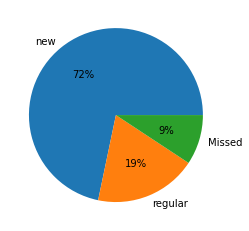

In [71]:
plt.pie(cycle_recent['status'].value_counts(), labels= cycle_recent['status'].unique(), autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x2b044b81a30>,
 [Text(-0.8479858106821404, 0.7006568809922252, 'new'),
  Text(0.5875591038235689, -0.9299324166379214, 'regular'),
  Text(1.045277604401614, -0.34262914315105014, 'Missed')],
 [Text(-0.4625377149175311, 0.3821764805412137, '78%'),
  Text(0.3204867839037648, -0.5072358636206843, '12%'),
  Text(0.5701514205826985, -0.18688862353693644, '10%')])

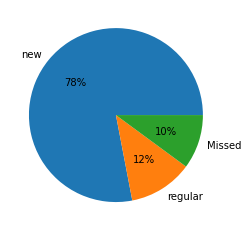

In [72]:
plt.pie(cycle_recent[cycle_recent['user_id'].isin(users[users['count']>1]['user_id'])]['status'].value_counts(), labels= cycle_recent['status'].unique(), autopct='%1.0f%%')

In [73]:

symptoms.drop_duplicates(inplace = True)

In [120]:
sym_user = symptoms.groupby('user_id').sum()

In [121]:
sym_user

,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
user_id,,,,,,,,,
1002,156.0,80.0,287.0,0.0,0.0,179.0,260.0,19.0,0.0
1003,381.0,0.0,591.0,125.0,241.0,778.0,0.0,105.0,1.0
1004,69.0,44.0,0.0,0.0,116.0,64.0,89.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,53.0
1007,68.0,68.0,24.0,0.0,0.0,0.0,98.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...
992,19.0,15.0,25.0,0.0,15.0,18.0,28.0,49.0,16.0
993,0.0,26.0,36.0,0.0,0.0,0.0,57.0,0.0,94.0
994,58.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0


In [107]:
sym_user_bool = sym_user
sym_user_bool[sym_user_bool != 0] = 1

In [108]:
sym_user_bool

,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
user_id,,,,,,,,,
1002,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1003,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1004,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1007,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
992,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
993,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

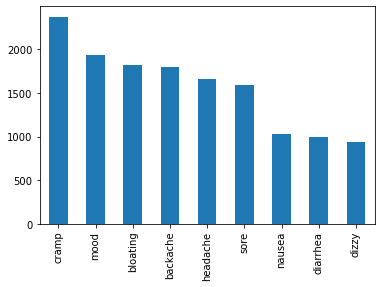

In [109]:
sym_user.sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

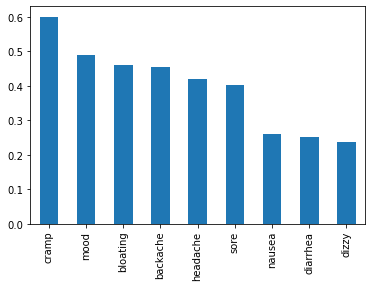

In [110]:

((sym_user_bool.sum())/len(sym_user_bool)).sort_values(ascending=False).plot(kind='bar')


In [111]:
((sym_user_bool.sum())/len(sym_user_bool)).sort_values(ascending=False)

cramp       0.601062
mood        0.491019
bloating    0.461675
backache    0.453580
headache    0.418669
sore        0.402479
nausea      0.259297
diarrhea    0.250949
dizzy       0.235770
dtype: float64

60% users have cramp

<AxesSubplot:>

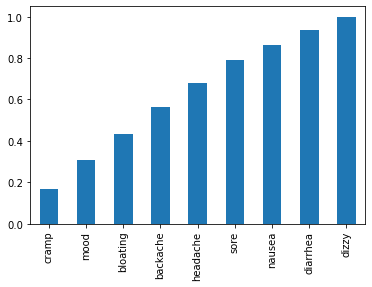

In [112]:
(sym_user.sum().sort_values(ascending=False).cumsum()/sym_user.sum().sum()).plot(kind='bar')

cramp, mood, bloating, backache and headache contribute to 80% of severity of the symptoms

In [113]:
sym_user_avg = symptoms.groupby('user_id').mean()

<AxesSubplot:>

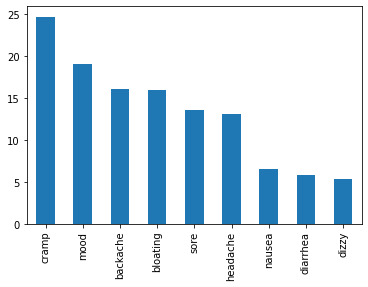

In [114]:
symptoms.groupby('user_id').mean().mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

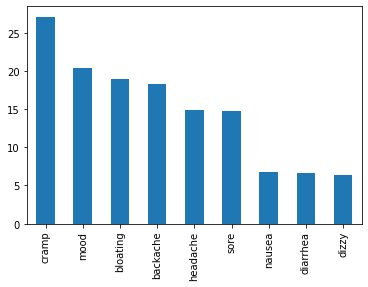

In [115]:
 symptoms.groupby('record_id').sum().mean().sort_values(ascending=False).plot(kind='bar')

In [116]:
symptoms.groupby('user_id').sum()

,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
user_id,,,,,,,,,
1002,156.0,80.0,287.0,0.0,0.0,179.0,260.0,19.0,0.0
1003,381.0,0.0,591.0,125.0,241.0,778.0,0.0,105.0,1.0
1004,69.0,44.0,0.0,0.0,116.0,64.0,89.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,53.0
1007,68.0,68.0,24.0,0.0,0.0,0.0,98.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...
992,19.0,15.0,25.0,0.0,15.0,18.0,28.0,49.0,16.0
993,0.0,26.0,36.0,0.0,0.0,0.0,57.0,0.0,94.0
994,58.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0


In [123]:

sym_user['total_score'] = sym_user[list(sym_user.columns)].sum(axis=1)

In [124]:
sym_user

,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,total_score
user_id,,,,,,,,,,
1002,156.0,80.0,287.0,0.0,0.0,179.0,260.0,19.0,0.0,981.0
1003,381.0,0.0,591.0,125.0,241.0,778.0,0.0,105.0,1.0,2222.0
1004,69.0,44.0,0.0,0.0,116.0,64.0,89.0,0.0,0.0,382.0
1006,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,53.0,78.0
1007,68.0,68.0,24.0,0.0,0.0,0.0,98.0,0.0,36.0,294.0
...,...,...,...,...,...,...,...,...,...,...
992,19.0,15.0,25.0,0.0,15.0,18.0,28.0,49.0,16.0,185.0
993,0.0,26.0,36.0,0.0,0.0,0.0,57.0,0.0,94.0,213.0
994,58.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,153.0


In [125]:
len(sym_user[sym_user['total_score']==0])/len(sym_user)

0.21300278269668607

In [126]:
len(cycle_recent['user_id'].unique())

6618

In [127]:
cycle_recent_days = cycle_recent[['user_id','No_days']].groupby('user_id').mean()

In [128]:
sym_user = sym_user.join(cycle_recent_days)

In [129]:
sym_user

,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,total_score,No_days
user_id,,,,,,,,,,,
1002,156.0,80.0,287.0,0.0,0.0,179.0,260.0,19.0,0.0,981.0,4.0
1003,381.0,0.0,591.0,125.0,241.0,778.0,0.0,105.0,1.0,2222.0,4.0
1004,69.0,44.0,0.0,0.0,116.0,64.0,89.0,0.0,0.0,382.0,8.0
1006,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,53.0,78.0,7.0
1007,68.0,68.0,24.0,0.0,0.0,0.0,98.0,0.0,36.0,294.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...
992,19.0,15.0,25.0,0.0,15.0,18.0,28.0,49.0,16.0,185.0,7.0
993,0.0,26.0,36.0,0.0,0.0,0.0,57.0,0.0,94.0,213.0,4.5
994,58.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,153.0,3.0


To see if there is a relationship between average num of bleeding days and the severity of symptoms

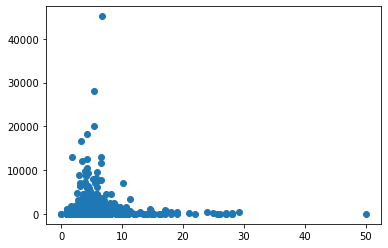

In [130]:
plt.scatter(sym_user.No_days, sym_user.total_score)

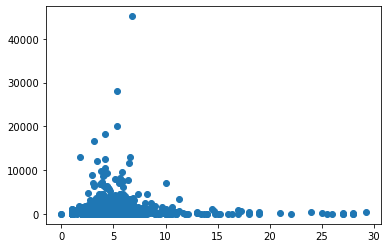

In [131]:
plt.scatter(sym_user[sym_user['No_days']<40].No_days, sym_user[sym_user['No_days']<40].total_score)

Ignoring users who have only one row of data

In [132]:
l1 = cycle_recent.groupby('user_id').status.count()>1

In [133]:
active = l1[l1].index

In [134]:
sym_user['user_id'] = sym_user.index

In [135]:
active_user = sym_user[sym_user['user_id'].isin(active)]

In [136]:
active_user

,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,total_score,No_days,user_id
user_id,,,,,,,,,,,,
1002,156.0,80.0,287.0,0.0,0.0,179.0,260.0,19.0,0.0,981.0,4.0,1002
1003,381.0,0.0,591.0,125.0,241.0,778.0,0.0,105.0,1.0,2222.0,4.0,1003
1004,69.0,44.0,0.0,0.0,116.0,64.0,89.0,0.0,0.0,382.0,8.0,1004
1006,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,53.0,78.0,7.0,1006
1007,68.0,68.0,24.0,0.0,0.0,0.0,98.0,0.0,36.0,294.0,3.6,1007
...,...,...,...,...,...,...,...,...,...,...,...,...
989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,93.0,4.0,989
991,44.0,37.0,95.0,0.0,0.0,51.0,34.0,0.0,33.0,294.0,4.0,991
993,0.0,26.0,36.0,0.0,0.0,0.0,57.0,0.0,94.0,213.0,4.5,993


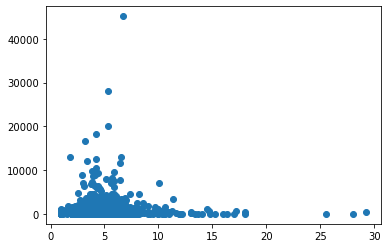

In [137]:
plt.scatter(active_user[active_user['No_days']<40].No_days, active_user[active_user['No_days']<40].total_score)

The above chart shows users with regular number of bleeding days have more severe symptoms

In [138]:
cycle_recent[cycle_recent['cycle_days']>45].cycle_days.mean()

90.13763174209548

In [139]:
cycle_recent[(cycle_recent['cycle_days']<45) & (cycle_recent['cycle_days']>0)].cycle_days.mean()

28.841078669910786

The average periods cycle is 29 days and the average missed days in 90 days

In [147]:
cycle_recent.groupby('user_id').record_id.count().mean()

5.2594439407676035

In [146]:
cycle_recent.groupby('user_id').record_id.count().median()

2.0

In [144]:
cycle_recent.groupby('user_id').record_id.count().max()

60